In [250]:
import geopandas as gpd
import gspatial_plot as gsp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplleaflet

In [251]:
states = gpd.read_file("us_states.geojson")
fires = gpd.read_file("Monitoring_Trends_in_Burn_Severity _Fire_Occurrence_Locations_and_Burned_Area_Boundaries.geojson")

In [252]:
# states = states[
#     ~states["NAME"].isin(
#         [
#             "Guam",
#             "American Samoa",
#             "Commonwealth of the Northern Mariana Islands",
#             "Alaska",
#             "Hawaii"
#         ]
#     )
# ]

In [253]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"MULTIPOLYGON (((-96.62188 42.77925, -96.57794 ..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.77379 39.72220, -75.75323 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"MULTIPOLYGON (((-80.51989 40.90666, -80.51964 ..."


In [254]:
fires.head()

,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,...,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS,geometry
0,526496,AL3276508694720210320,Initial,802003720210313,802003720210329,-970,70,9999,9999,32.776,...,2021-03-20 00:00:00+00:00,1966,F512DED1-3A47-40F9-AA5C-AA8ECB5555E5,10021865,MTBS,NaN,34,17,NaN,POINT (-86.94711 32.77450)
1,526497,AL3279308700220211120,Initial,B16SDB20211115_30m,A16SDB20211123_30m,-970,80,9999,9999,32.785,...,2021-11-20 00:00:00+00:00,578,D7A20B61-04AA-42FE-ABCA-865F129167EE,10022026,MTBS,NaN,65,31,AL3277908698120211116 is a duplicate of this f...,POINT (-87.00658 32.78629)
2,526498,AL3290408705120210321,Initial,B16SDB20210320_30m,B16SDB20210402_30m,-970,10,9999,9999,32.911,...,2021-03-21 00:00:00+00:00,1313,9ECE2635-8788-4E37-91A7-82FA3C45EEEA,10021855,MTBS,NaN,-12,20,NaN,POINT (-87.05778 32.90670)
3,526499,AL3314708607620210419,Initial,A16SEB20200509_30m,B16SEB20210509_30m,-970,20,9999,9999,33.151,...,2021-04-19 00:00:00+00:00,1826,E18DFB2D-271E-4ECE-953A-B7BC5CFE6718,10021921,MTBS,NaN,-8,15,NaN,POINT (-86.08856 33.14911)
4,526500,AL3315508618420211119,Initial,B16SEB20201120_30m,B16SEB20211125_30m,-970,90,9999,9999,33.156,...,2021-11-19 00:00:00+00:00,670,CB27E9BA-2B5D-4128-B92B-A38AE1246C81,10021983,MTBS,NaN,25,31,NaN,POINT (-86.18762 33.15883)


In [255]:
# fires.info()
fires.shape

(547, 24)

In [256]:
states.shape

(52, 10)

In [257]:
states = states.explode(column="geometry")
states = states.reset_index(drop=True)
states.head()

/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_6631/2831718965.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  states = states.explode(column="geometry")


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"POLYGON ((-76.04621 38.02553, -76.00734 38.036..."
1,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"POLYGON ((-79.48437 39.34430, -79.48237 39.531..."
2,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62188 42.77925, -96.57794 42.827..."
3,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
4,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"POLYGON ((-82.86334 41.69369, -82.82572 41.722..."


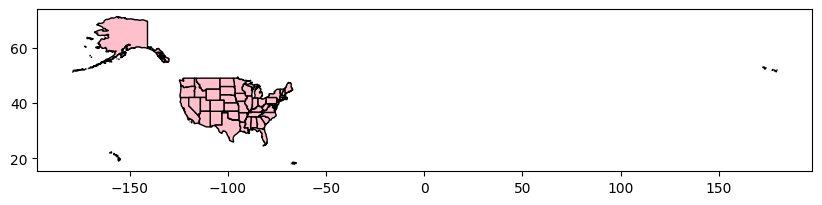

In [258]:
# Plot the states
fig, ax = plt.subplots(figsize=(10, 10))
states.plot(ax=ax, color="pink", edgecolor="black")
plt.show()

### Task 1 : Do a spatial join on two datasets such that each fire occurance has state information (Look for sjoin in geopandas documentation)

In [259]:
# Rename the index columns in both GeoDataFrames
fires = fires.rename_axis('fire_id').reset_index()
states = states.rename_axis('state_id').reset_index()

# Perform the spatial join using the renamed index columns
fires = gpd.sjoin(fires, states, how="left", op="within")
fires['geometry'].head()

/Users/pratyushagrawal/Desktop/DAV_Projects/Internship_Assignments/Ambee/Intern Assignment/env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


0    POINT (-86.94711 32.77450)
1    POINT (-87.00658 32.78629)
2    POINT (-87.05778 32.90670)
3    POINT (-86.08856 33.14911)
4    POINT (-86.18762 33.15883)
Name: geometry, dtype: geometry

In [260]:
fires.columns

Index(['fire_id', 'OBJECTID', 'FIRE_ID', 'ASMNT_TYPE', 'PRE_ID', 'POST_ID',
       'NODATA_THRESHOLD', 'LOW_THRESHOLD', 'MODERATE_THRESHOLD',
       'HIGH_THRESHOLD', 'LATITUDE', 'LONGITUDE', 'FIRE_TYPE', 'FIRE_NAME',
       'GREENNESS_THRESHOLD', 'IG_DATE', 'ACRES', 'IRWINID', 'MAP_ID',
       'MAP_PROG', 'PERIM_ID', 'DNBR_OFFST', 'DNBR_STDDV', 'COMMENTS',
       'geometry', 'index_right', 'state_id', 'STATEFP', 'STATENS', 'AFFGEOID',
       'GEOID', 'STUSPS', 'NAME', 'LSAD', 'ALAND', 'AWATER'],
      dtype='object')

### Task 2 : Which state had the most number of fires?

In [261]:
# Which state had the most number of fires?
fires['NAME'].value_counts()
print("State with most fires: ", fires['NAME'].value_counts().index[0])

State with most fires:  Alabama


### Task 3 : Which state had the least number of fires?

In [262]:
# Which state had the least number of fires?
print("State with least fires: ", fires['NAME'].value_counts().index[-1])

State with least fires:  Michigan


### Task 4 : Is there any relationship between number of fires vs total water area (AWATER)?

In [263]:
# Create a new DataFrame with the number of fires and total water area by state
fires_by_state = fires.groupby('NAME').agg({'fire_id': 'count', 'AWATER': 'sum'})

# Calculate the correlation coefficient between the number of fires and total water area
correlation = fires_by_state['fire_id'].corr(fires_by_state['AWATER'])

# Print the correlation coefficient
print("Correlation coefficient between number of fires and total water area: ", correlation)


Correlation coefficient between number of fires and total water area:  0.7120638063621468


As the value of correlation coefficient is relatively higher than 0.5, we can say that there is a positive correlation between number of fires and total water area.
Hence there exist some relationship between number of fires and total water area.

### Task 5 : Plot a heatmap of fires (You can use gspatial-plot or geopandas or any other library)

In [264]:
import folium
from folium.plugins import HeatMap

# Create a new map centered at the mean coordinates of the fires
map_fires = folium.Map(location=[fires['LATITUDE'].mean(), fires['LONGITUDE'].mean()], zoom_start=5)

# Create a heatmap layer using the coordinates and acres burned columns of the fires dataframe
heatmap_data = [[row['LATITUDE'], row['LONGITUDE'], row['ACRES']] for index, row in fires.iterrows()]
HeatMap(heatmap_data, name='Fires', radius=12, max_val=max(fires['ACRES'])).add_to(map_fires)

# Add a layer control to toggle the heatmap on and off
folium.LayerControl().add_to(map_fires)

# Display the map
map_fires


/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_6631/164566258.py:9: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heatmap_data, name='Fires', radius=12, max_val=max(fires['ACRES'])).add_to(map_fires)


### Task 6 : Plot a density map of fire occurances (You can use gspatial-plot or seaborn or any other library)

/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_6631/3467856584.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


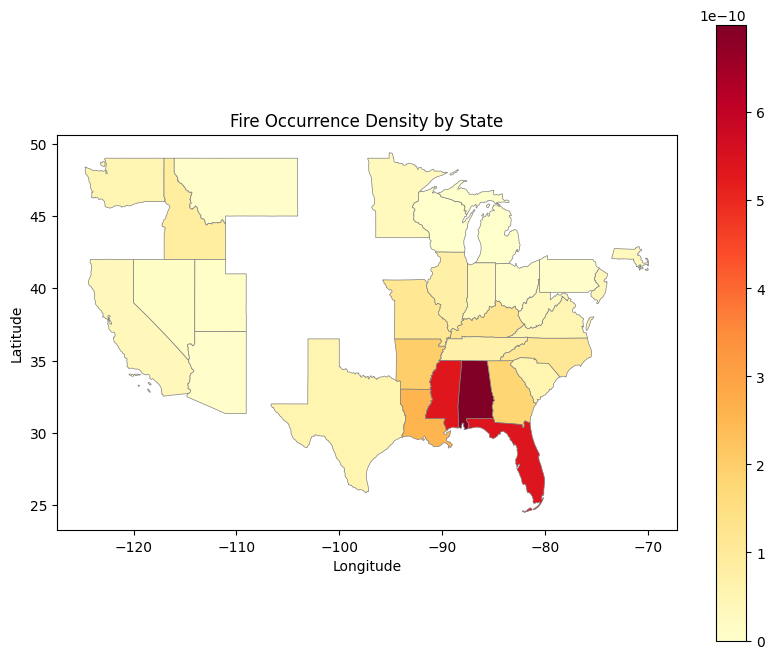

In [265]:
# Group the fires GeoDataFrame by state and count the number of fires in each state
fire_count = fires.groupby('STUSPS').size().reset_index(name='fire_count')

# Join the fire count data to the state boundaries GeoDataFrame
states = states.merge(fire_count, on='STUSPS', how='left')

# Calculate the density of fires in each state
states['fire_density'] = states['fire_count'] / (states['ALAND'] + states['AWATER'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')

# Plot the state boundaries and fill them with a color map based on the fire density
states.plot(ax=ax, column='fire_density', cmap='YlOrRd', edgecolor='grey', linewidth=0.5)

# Add a color bar to the plot
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=states['fire_density'].max()))
sm._A = []
cbar = fig.colorbar(sm)

# Add a title and axis labels to the plot
ax.set_title("Fire Occurrence Density by State")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


### Task 7 : Which state had the highest number of Wildfires? (FIRE_TYPE column)

In [266]:
# Group the data by state and fire type, count the number of fires in each group
fire_counts = fires.groupby(['NAME', 'FIRE_TYPE']).size().reset_index(name='fire_count')

# fire_counts.head()
# Filter the results to only include wildfires
wildfire_counts = fire_counts[fire_counts['FIRE_TYPE'] == 'Wildfire']

# # Find the state with the highest number of wildfires
max_wildfires = wildfire_counts['fire_count'].max()
state_with_max_wildfires = wildfire_counts[wildfire_counts['fire_count'] == max_wildfires]['NAME'].iloc[0]
print("State with most wildfires: ", state_with_max_wildfires)

State with most wildfires:  Idaho


### Task 8 : Which state had the highest number of acres burned? (ACRES)

In [267]:
# Group the data by state and sum the total number of acres burned in each group
acres_burned = fires.groupby('NAME')['ACRES'].sum()

# Find the state with the highest number of acres burned
max_acres_burned = acres_burned.max()
state_with_max_acres_burned = acres_burned[acres_burned == max_acres_burned].index[0]

print("State with most acres burned: ", state_with_max_acres_burned)

State with most acres burned:  Florida


### Task 9 : Which Month had highest number of fires?

In [268]:
# Convert the IG_DATE column to a datetime column and extract the month component
fires['IG_DATE'] = pd.to_datetime(fires['IG_DATE'])
fires['month'] = fires['IG_DATE'].dt.month

# Group the data by month and count the number of fires in each group
fires_by_month = fires.groupby('month')['FIRE_ID'].count()

# Find the month with the highest number of fires
max_fires = fires_by_month.max()
month_with_max_fires = fires_by_month[fires_by_month == max_fires].index[0]

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("Month with most fires: ", months[month_with_max_fires - 1])

Month with most fires:  March


### Task 10 : Which State had highest number of fires for the month in question 9?

In [269]:
fires_by_state = fires[fires['month'] == month_with_max_fires].groupby('NAME').size()
max_fires = fires_by_state.max()
state_with_max_fires = fires_by_state[fires_by_state == max_fires].index[0]
print("State with most fires in the month with most fires: ", state_with_max_fires)

State with most fires in the month with most fires:  Mississippi
